In [ ]:
import os
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt
import seaborn as sns
import random
import re

In [85]:
import ipympl
%matplotlib inline
%matplotlib widget

# data read

In [3]:
# matplot setting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
fname="c:/Windows/Fonts/batang.ttc"
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/batang.ttc").get_name()
#font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
# plt.style.use('dark_background')

In [4]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline


In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df_card_flow_dir = "../../data/가공데이터/df_final.csv"
df_shop_list = "업종코드.csv"

In [7]:
df_card_flow = pd.read_csv(df_card_flow_dir)

In [8]:
df_shop = pd.read_csv(df_shop_list, encoding = 'euc-kr')

In [9]:
#del df_card_flow['Unnamed: 0']
df_card_flow = df_card_flow.drop(columns = ['co2', 'vocs', 'noise', 'temp', 'humi', 'pm25'])

In [10]:
df_card_flow = df_card_flow.dropna()

In [11]:
df_card_flow.성별코드 = df_card_flow.성별코드.replace('F', -1)
df_card_flow.성별코드 = df_card_flow.성별코드.replace('M', 1)
df_card_flow.예보 = df_card_flow.예보.replace('좋음', 1)
df_card_flow.예보 = df_card_flow.예보.replace('보통', 1)
df_card_flow.예보 = df_card_flow.예보.replace('나쁨', -1)
df_card_flow.예보 = df_card_flow.예보.replace('매우나쁨', -1)

In [12]:
df_card_flow = df_card_flow.drop(columns = ['구_y', 'Unnamed: 0'])
df_card_flow = df_card_flow.rename(columns = {'구_x' : '구'})

In [13]:
for df in [df_card_flow]:
    df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

df_card_flow['week'] = df_card_flow['날짜'].dt.weekday

for df in [df_card_flow]:
    df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

df_card_flow['month'] = df_card_flow['날짜'].dt.month


In [82]:
df_card_flow.head()

,날짜,구,동,예보,pm10,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,...,사회활동_비중,임신/육아_비중,업종코드,성별코드,나이코드,이용건수,이용금액,FLOW_POP_CNT,week,month
210,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.002467,0.00925,10,-1,25,39,4936,6892.47,6,4
211,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.002467,0.00925,21,-1,25,18,565,6892.47,6,4
212,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.002467,0.00925,22,-1,25,149,1709,6892.47,6,4
213,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.002467,0.00925,34,-1,25,13,101,6892.47,6,4
214,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.002467,0.00925,40,-1,25,556,4611,6892.47,6,4


In [35]:
a = (df_card_flow.groupby('month')['pm10'].describe())[['mean', 'std', 'min', 'max']].T
a[[4, 5, 6, 7, 8, 9, 10, 11, 12]].merge(a[[1,2, 3]], left_index = True, right_index = True)

month,4,5,6,7,8,9,10,11,12,1,2,3
mean,51.752761,48.012935,42.129153,33.718234,35.810453,31.762210,40.317754,61.846607,58.661901,87.796104,83.716824,87.077800
std,24.540373,27.609890,16.391750,15.247015,14.520903,13.179716,20.030162,33.530213,23.513189,46.143769,35.157475,70.961623
min,1.779167,5.095833,2.921528,2.068750,2.749306,0.878472,1.449306,6.040278,16.747222,26.950000,14.725000,12.754861
max,138.093750,130.948611,93.612500,88.917361,97.299306,70.368056,148.833333,245.084028,130.121528,399.573611,237.950694,435.559028


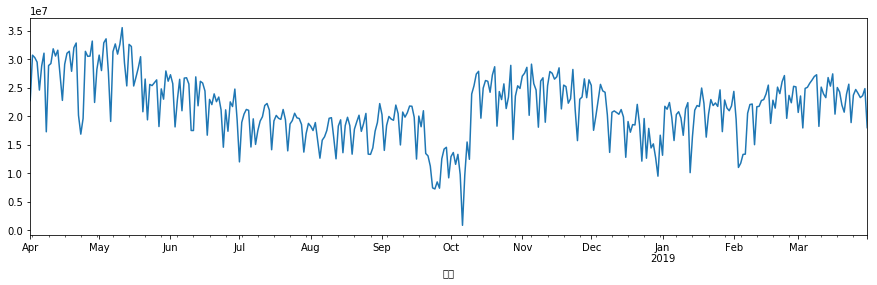

In [65]:
#df_card_flow[df_card_flow['성별코드'] == -1].groupby('날짜').mean()['FLOW_POP_CNT'].plot()
#df_card_flow[df_card_flow['성별코드'] == 1].groupby('날짜').mean()['FLOW_POP_CNT'].plot()

df_card_flow.groupby('날짜').sum()['FLOW_POP_CNT'].plot(figsize = (15,4))

In [59]:
a = (df_card_flow.groupby('month')['FLOW_POP_CNT'].describe())[['mean', 'std', 'min', 'max']].T
a[[4, 5, 6, 7, 8, 9, 10, 11, 12]].merge(a[[1,2, 3]], left_index = True, right_index = True)

month,4,5,6,7,8,9,10,11,12,1,2,3
mean,5710.845949,5583.648300,5188.733205,5127.983647,4810.932861,5017.887620,5658.052734,5711.04618,4310.229726,4809.455654,4956.422467,5415.454639
std,3687.118546,3705.611092,3295.363236,3190.678998,3049.686483,3395.151776,3555.463164,3606.20391,2769.560046,2860.810272,3001.462582,3631.923638
min,188.420000,251.570000,290.700000,245.240000,187.630000,254.230000,274.140000,125.30000,231.950000,319.850000,363.460000,384.230000
max,30419.080000,29890.330000,26807.980000,19612.800000,19645.630000,28259.610000,28889.920000,28974.98000,29269.340000,19119.580000,22770.630000,49455.780000


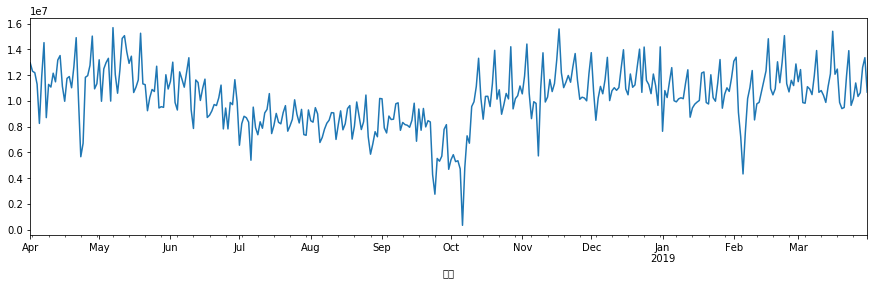

In [68]:
df_card_flow.groupby('날짜').sum()['이용금액'].plot(figsize = (15,4))

In [64]:
test = df_card_flow.groupby('날짜', as_index = False).sum()

test['month'] = test['날짜'].dt.month

a = (test.groupby('month')['이용금액'].describe())[['mean', 'std', 'min', 'max']].T
a[[4, 5, 6, 7, 8, 9, 10, 11, 12]].merge(a[[1,2, 3]], left_index = True, right_index = True)

month,4,5,6,7,8,9,10,11,12,1,2,3
mean,1.147723e+07,1.190488e+07,1.036456e+07,8.411283e+06,8.271509e+06,7.732605e+06,9.019081e+06,1.125620e+07,1.154398e+07,1.061797e+07,1.100760e+07,1.129772e+07
std,2.101474e+06,1.827285e+06,1.490847e+06,1.043617e+06,1.115935e+06,1.772935e+06,3.016224e+06,1.854652e+06,1.428685e+06,1.217787e+06,2.292613e+06,1.463439e+06
min,5.659141e+06,9.232750e+06,7.817558e+06,5.387901e+06,5.856610e+06,2.748664e+06,3.323820e+05,5.723329e+06,8.490047e+06,7.635509e+06,4.321883e+06,9.396705e+06
max,1.502794e+07,1.568416e+07,1.334732e+07,1.056305e+07,1.044992e+07,1.015867e+07,1.420146e+07,1.558248e+07,1.419137e+07,1.320571e+07,1.506449e+07,1.540332e+07


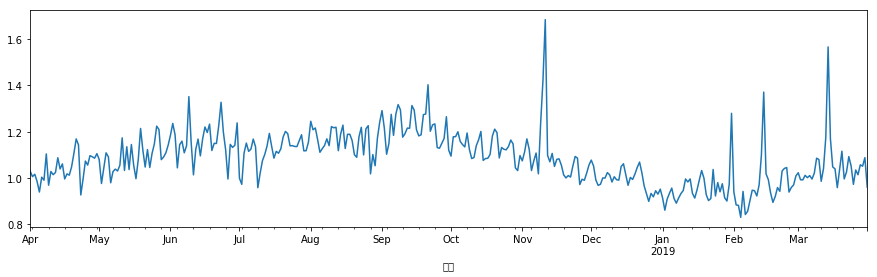

In [73]:
#df_card_flow[df_card_flow['성별코드'] == -1].groupby('날짜').mean()['FLOW_POP_CNT'].plot()
#df_card_flow[df_card_flow['성별코드'] == 1].groupby('날짜').mean()['FLOW_POP_CNT'].plot()

df_card_flow.groupby('날짜').mean()['매출지수'].plot(figsize = (15,4))

In [81]:


a = df_card_flow.groupby('month')['매출지수'].describe()[['mean', 'std', 'min', 'max']].T
a[[4, 5, 6, 7, 8, 9, 10, 11, 12]].merge(a[[1,2, 3]], left_index = True, right_index = True)

month,4,5,6,7,8,9,10,11,12,1,2,3
mean,1.042081,1.087627,1.164793,1.119809,1.166749,1.225156,1.128928,1.095540,0.993574,0.955086,0.967503,1.055340
std,0.263701,0.254822,0.259412,0.262934,0.286020,0.319211,0.279644,0.304252,0.259098,0.331767,0.292549,0.305585
min,0.390482,0.341198,0.433557,0.424541,0.298288,0.619347,0.351264,0.489023,0.328817,0.443996,0.486716,0.560284
max,2.095967,2.070129,2.354052,1.936484,1.883281,4.075011,2.249635,2.528287,2.194243,4.137623,2.208466,2.350735


# 월별 예보 지수 확인

In [86]:
df_card_flow_fc = df_card_flow

df_card_flow_fc = df_card_flow_fc.groupby(by = '날짜', as_index = False).mean()
dt = df_card_flow_fc['pm10']
df_card_flow_fc['예보'] = np.where(dt > 150, '-1', 
                             np.where(dt > 80, '-1',
                                     np.where(dt > 30, '1', '1')))
df_card_flow_fc['예보'] = df_card_flow_fc['예보'].astype(int)
#df_card_flow_fc_n = df_card_flow_fc[(df_card_flow_fc['month'] == 1) | (df_card_flow_fc['month'] == 2) | (df_card_flow_fc['month'] == 3)] 
df_card_flow_fc_month = df_card_flow_fc.groupby(by = 'month').mean()
df_card_flow_fc.groupby('month')['pm10','예보'].describe()


pm10                                                                    \
      count       mean        std        min        25%        50%        75%   
month                                                                           
1.0    31.0  87.928214  37.103529  54.014147  72.280471  77.775503  85.760109   
2.0    28.0  83.827233  20.432730  51.400060  71.673693  81.749434  94.833594   
3.0    31.0  86.608051  68.384943  27.356686  43.033387  59.751770  93.298330   
4.0    30.0  50.281078  23.482866   8.981919  32.754247  48.744227  67.410478   
5.0    31.0  48.081227  25.874849  13.347524  24.134134  46.970309  62.525385   
6.0    30.0  42.329377  14.347867   8.868758  37.577984  42.511749  49.409238   
7.0    31.0  33.321946  12.630558   8.456125  26.825313  31.514451  43.515054   
8.0    31.0  35.326406  11.151924  12.662236  27.142706  38.222143  42.660812   
9.0    30.0  31.060478  10.580051  13.367873  24.400331  29.846489  41.916548   
10.0   31.0  37.950292  17.155787   3.426815  27.307702  34.909429  45.421533   
11.0   30.0  61.675004  29.838051  13.659462  42.697527  53.631545  71.565324   
12.0   31.0  58.470053  16.210390  33.841445  49.676564  55.035741  68.364844   

                     예보                                               
              max count      mean       std  min  25%  50%  75%  max  
month                                                                 
1.0    243.661368  31.0  0.225806  0.990275 -1.0 -1.0  1.0  1.0  1.0  
2.0    129.558877  28.0 -0.142857  1.007905 -1.0 -1.0 -1.0  1.0  1.0  
3.0    320.705760  31.0  0.354839  0.950382 -1.0 -1.0  1.0  1.0  1.0  
4.0     97.366022  30.0  0.866667  0.507416 -1.0  1.0  1.0  1.0  1.0  
5.0     96.545052  31.0  0.612903  0.803219 -1.0  1.0  1.0  1.0  1.0  
6.0     71.659529  30.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
7.0     57.360578  31.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
8.0     61.858000  31.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
9.0     50.792159  30.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
10.0    77.825173  31.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
11.0   134.440160  30.0  0.600000  0.813676 -1.0  1.0  1.0  1.0  1.0  
12.0   103.737408  31.0  0.806452  0.601074 -1.0  1.0  1.0  1.0  1.0

# 월별 미세먼지 분포 확인(얼마나 정규분포에 가까운지)

 1. 월 리스트 뽑기
 2. 리스트별로 pm10 데이터의 hist 그리기
 --> 31개밖에 안되는 데이터라 정규분포를 논하는 의미가 없음.
 3. 1월 중심으로 먼저 비교해보기
 
 매출 지수 / 이용금액 / 유동인구는 각각 비교해볼 필요가 있음.
 매출 지수 같은경우는 평균을 내서 한번에 비교 가능

month :  1
month :  2
month :  3
month :  4
month :  5
month :  6
month :  7
month :  8
month :  9
month :  10
month :  11
month :  12


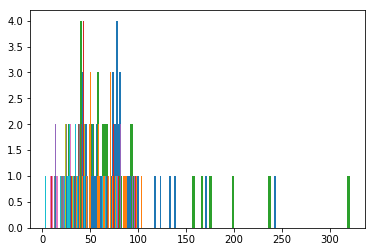

In [15]:
#2. 리스트별로 pm10 데이터의 hist 그리기

month_list = range(1,13)

for mon in month_list:
    
    print('month : ', mon)
    df_mon = df_card_flow_fc[df_card_flow_fc['month'] == mon]
    plt.hist(df_mon.pm10, bins = 100)
    #plt.show()

In [17]:
#1월달 내의 좋음 데이터 안좋음 gs매출 데이터 비교, 같은 요일 기준 비교, 큰 유의차 없음
#1월달 데이터

df_1 = df_card_flow_fc[df_card_flow_fc['month'] == 1]

#1월달의 안좋음 데이터

df_1_b = df_1[df_1['예보'] == -1]

#1월달의 좋음 데이터

df_1_g = df_1[df_1['예보'] == 1]

g_1 = df_1_g.describe()
b_1 = df_1_b.describe()

#print(df_1_g.iloc[4] - df_1_b.iloc[3])
#print(df_1_g.iloc[5] - df_1_b.iloc[4])
#print(df_1_g.iloc[6] - df_1_b.iloc[5])
#print(df_1_g.iloc[9] - df_1_b.iloc[8])
#print(df_1_g.iloc[12] - df_1_b.iloc[9])
#print(df_1_g.iloc[13] - df_1_b.iloc[10])
#print(df_1_g.iloc[14] - df_1_b.iloc[11])

a1 = (df_1_g.iloc[4] - df_1_b.iloc[3])
a2 = (df_1_g.iloc[5] - df_1_b.iloc[4])
a3 = (df_1_g.iloc[6] - df_1_b.iloc[5])
a4 = (df_1_g.iloc[9] - df_1_b.iloc[8])
a5 = (df_1_g.iloc[12] - df_1_b.iloc[9])
a6 = (df_1_g.iloc[13] - df_1_b.iloc[10])
a7 = (df_1_g.iloc[14] - df_1_b.iloc[11])

print(a1 + a2 + a3 + a4 + a5 + a6 + a7)

#print(df_1_g[['날짜', 'week']])
#print(df_1_b[['날짜', 'week']])

날짜              -49 days +00:00:00
예보                              14
pm10                      -374.017
매출지수                     -0.573071
식사_비중                    -0.013463
간식_비중                   -0.0356842
마실거리_비중                  0.0673325
홈&리빙_비중                  0.0158011
헬스&뷰티_비중                -0.0389449
취미&여가활동_비중              0.00243777
사회활동_비중                 0.00810311
임신/육아_비중               -0.00558227
업종코드                       1.64196
성별코드                       0.01737
나이코드                     -0.147385
이용건수                      -7.75198
이용금액                      -248.282
FLOW_POP_CNT               1691.35
week                             0
month                            0
dtype: object


# 요일 별 이용금액

1. 요일별로 미세먼지 vs 이용금액 품목 corr를 비교한다.
2. 11~3월 데이터 소팅
3. 소팅한 데이터 내의 pivot table 확인

In [87]:
df_card_flow_shop = df_card_flow.merge(df_shop, on='업종코드')

df_card_flow_shop.head()


,날짜,구,동,예보,pm10,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,...,임신/육아_비중,업종코드,성별코드,나이코드,이용건수,이용금액,FLOW_POP_CNT,week,month,업종명
0,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.00925,10,-1,25,39,4936,6892.47,6,4,숙박
1,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.00925,10,-1,30,53,6218,5743.10,6,4,숙박
2,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.00925,10,-1,35,9,330,5817.91,6,4,숙박
3,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.00925,10,-1,45,4,215,6104.03,6,4,숙박
4,2018-04-01,종로구,사직동,1,68.306944,1.258473,0.237403,0.257984,0.349826,0.045502,...,0.00925,10,-1,50,4,1108,4998.93,6,4,숙박


# 18.11월 ~ 19.3월 까지의 좋음(보통, 좋음) vs 나쁨(나쁨, 매우나쁨) 신한카드 데이터 비교

In [94]:
month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_target = df_card_flow_shop[df_card_flow_shop.month.isin(month_list)]

df_target_list = df_card_flow_fc[df_card_flow_fc.month.isin(month_list)]

df_target_g = df_target[df_target['예보'] == 1]
df_target_b = df_target[df_target['예보'] == -1]

df_target_g_list = df_target_list[df_target_list['예보'] == 1]
df_target_b_list = df_target_list[df_target_list['예보'] == -1]


print(df_target_g.shape,df_target_b.shape)

(1232770, 23) (276178, 23)


In [102]:
a = df_target_b.groupby('날짜').mean()
b = a.groupby('month').sum()
b

,예보,pm10,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,업종코드,성별코드,나이코드,이용건수,이용금액,FLOW_POP_CNT,week
month,,,,,,,,,,,,,,,,,,
1.0,-31.0,3374.909564,30.330703,10.957769,6.304711,10.396014,1.043931,1.673503,0.190817,0.343166,0.090089,1680.588496,-0.014687,1293.037759,3267.053369,75259.683110,133881.040489,90.0
2.0,-27.0,2948.828082,26.747356,8.700448,6.190732,9.089649,0.948005,1.505196,0.182766,0.300271,0.082934,1453.256612,0.028842,1126.018217,2778.801703,63942.485672,113951.730493,78.0
3.0,-20.0,2562.081799,21.079804,6.336117,4.549349,6.768325,0.560675,1.364700,0.117117,0.226476,0.077241,1088.679186,0.054036,834.748775,2240.322163,46747.648668,96400.807903,55.0
4.0,-14.0,1279.863404,14.648909,4.355396,3.052223,5.171829,0.409104,0.702684,0.112119,0.150403,0.046241,758.297337,0.144873,585.579826,1566.077069,32148.108432,77756.247943,44.0
5.0,-10.0,933.657479,11.235349,3.013373,2.128047,3.812511,0.247385,0.563286,0.089133,0.098014,0.048252,530.276028,-0.037884,418.206011,1367.773106,29926.545618,60338.068350,28.0
6.0,-3.0,258.906370,3.479954,0.918550,0.605275,1.116344,0.111615,0.184437,0.019240,0.035024,0.009515,156.797156,-0.001885,123.820988,395.850223,7855.938153,14339.275749,11.0
7.0,-1.0,88.917361,1.084842,0.290651,0.170861,0.429326,0.049687,0.042234,0.001742,0.013884,0.001615,50.484848,-0.038961,40.606061,159.354978,2461.142857,5139.965325,4.0
8.0,-1.0,86.129619,1.288295,0.299006,0.174992,0.438191,0.028605,0.046064,0.003126,0.007474,0.002543,51.677419,0.015532,40.908005,169.499403,3863.044205,4775.854564,4.0
10.0,-6.0,621.662346,6.080408,2.085278,1.113821,2.171504,0.138386,0.366580,0.039525,0.062731,0.022176,337.640157,-0.082302,243.603423,428.347855,8849.639355,22644.280109,17.0


In [91]:
day_g = list(set(df_target_g_list.날짜.values))
day_b = list(set(df_target_b_list.날짜.values))
sample_size = len(day_b)
day_g_115 = random.sample(day_g, k = sample_size)
day_b_115 = random.sample(day_b, k = sample_size)

print(len(day_g), len(day_b))
print(sample_size)

df_target_g_rand = df_target_g[df_target_g['날짜'].isin(day_g_115)]
df_target_b_rand = df_target_b[df_target_b['날짜'].isin(day_b_115)]

print(len(set(day_g_115)))
print(len(list(set(df_target_g_rand.날짜.values))))
print(len(list(set(df_target_b_rand.날짜.values))))
df_target_g_rand['예보'] = 1
df_target_b_rand['예보'] = -1

df_target = pd.concat([df_target_g_rand, df_target_b_rand])


310 55
55
55
55
55


In [32]:
df_target.corr()

,예보,pm10,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,업종코드,성별코드,나이코드,이용건수,이용금액,FLOW_POP_CNT,week,month
예보,1.000000,-0.732575,-0.067034,0.146242,-0.153678,0.013828,0.015497,-0.084183,-0.034195,-0.089871,-0.074638,0.001109,0.001282,0.000786,0.015099,0.014333,0.040721,-0.052393,0.444613
pm10,-0.732575,1.000000,0.040048,-0.076551,0.075048,-0.044956,-0.024106,0.125975,-0.025962,0.039692,0.188431,0.005218,-0.002115,0.001957,-0.016608,-0.018606,-0.065224,-0.048419,-0.429983
매출지수,-0.067034,0.040048,1.000000,0.091289,-0.062669,-0.161870,0.116558,0.144088,-0.222882,-0.048964,-0.104098,-0.043324,-0.004148,-0.011002,0.103250,0.113092,0.036799,0.086025,0.039070
식사_비중,0.146242,-0.076551,0.091289,1.000000,-0.534708,-0.580757,-0.123492,-0.380386,-0.070013,-0.214914,-0.195913,0.021439,-0.001918,0.017312,-0.052028,-0.045930,-0.096623,-0.210232,0.004169
간식_비중,-0.153678,0.075048,-0.062669,-0.534708,1.000000,-0.086523,-0.162408,-0.175001,0.015216,-0.055081,0.126944,0.027745,0.001570,0.001240,-0.014989,-0.016607,-0.042919,0.157260,-0.066957
마실거리_비중,0.013828,-0.044956,-0.161870,-0.580757,-0.086523,1.000000,-0.186965,0.111898,-0.077179,0.012913,0.085069,-0.033650,0.002991,-0.007270,0.051370,0.039357,0.166094,0.124041,0.061867
홈&리빙_비중,0.015497,-0.024106,0.116558,-0.123492,-0.162408,-0.186965,1.000000,0.057994,-0.023683,0.047727,-0.107575,-0.011560,0.000442,-0.012011,0.041396,0.057712,-0.007386,0.009238,0.011192
헬스&뷰티_비중,-0.084183,0.125975,0.144088,-0.380386,-0.175001,0.111898,0.057994,1.000000,-0.000192,0.216692,0.067656,-0.043391,-0.001210,-0.020208,0.056081,0.050890,0.094617,0.051029,0.024400
취미&여가활동_비중,-0.034195,-0.025962,-0.222882,-0.070013,0.015216,-0.077179,-0.023683,-0.000192,1.000000,0.165386,0.037782,0.020125,0.000792,0.004933,-0.057450,-0.054005,-0.070399,-0.030735,-0.023689
사회활동_비중,-0.089871,0.039692,-0.048964,-0.214914,-0.055081,0.012913,0.047727,0.216692,0.165386,1.000000,-0.005375,-0.003106,-0.007377,-0.018246,-0.010816,-0.016477,-0.082565,-0.030972,-0.047219


In [33]:
shop_list = set(df_target['업종명'].values)
sex_list = set(df_target['성별코드'].values)
age_list = set(df_target['나이코드'].values)

#print(shop_list)

shop_data = []
shop_data_name = []

for age,sex,shop in itertools.product(age_list, sex_list, shop_list):
    #print(shop)
    data_name = 'data_' + str(age) + '_' + str(sex) + str(shop)
    shop_data.append(df_target[(df_target['나이코드'] == age) & (df_target['성별코드'] == sex) & (df_target['업종명'] == shop)])
    shop_data_name.append(data_name)


In [122]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [34]:
shop_data_new = []

for data in shop_data:
    data_new = remove_outlier(data, '이용금액')
    shop_data_new.append(data_new)

NameError: name 'remove_outlier' is not defined

118248
550
2.302338460922615
data_65_1연료판매


            예보      이용금액
예보    1.000000  0.151169
이용금액  0.151169  1.000000


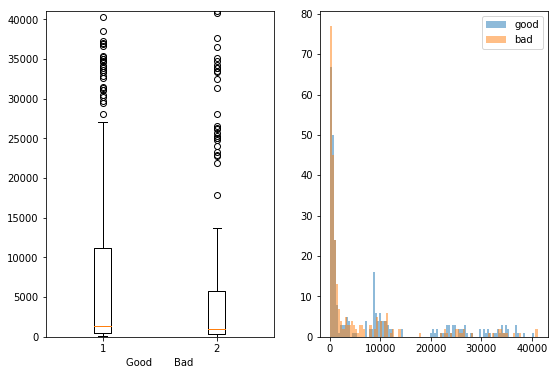

171339
1049
2.3177029248251055
data_65_1유통업


            예보      이용금액
예보    1.000000  0.158851
이용금액  0.158851  1.000000


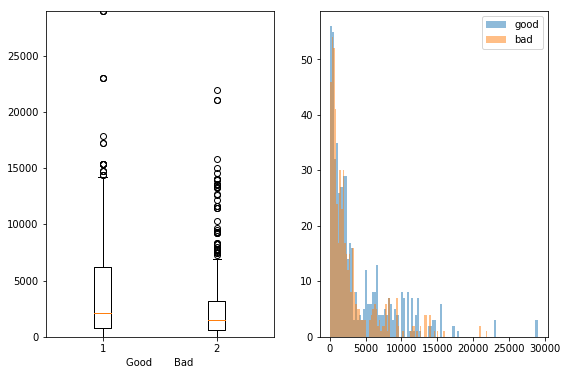

190774
1046
2.2665713981600195
data_65_-1유통업


            예보      이용금액
예보    1.000000  0.133286
이용금액  0.133286  1.000000


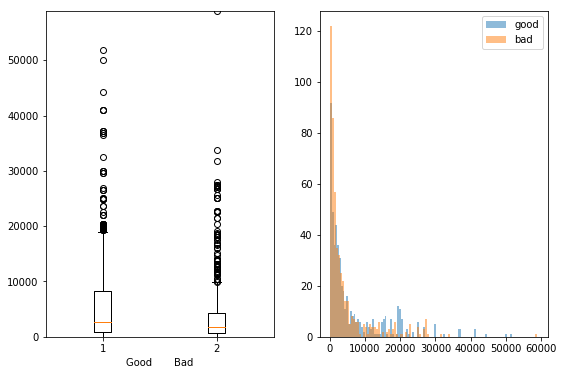

469427
1050
2.2642719906944366
data_35_1유통업


            예보      이용금액
예보    1.000000  0.132136
이용금액  0.132136  1.000000


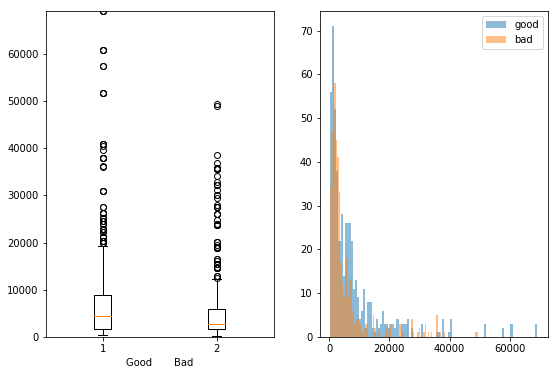

390613
1050
2.2272241698191992
data_35_-1유통업


            예보      이용금액
예보    1.000000  0.113612
이용금액  0.113612  1.000000


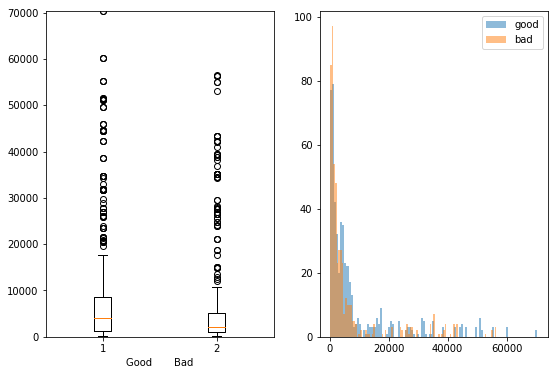

387233
1050
2.3025398278639497
data_40_1유통업


           예보     이용금액
예보    1.00000  0.15127
이용금액  0.15127  1.00000


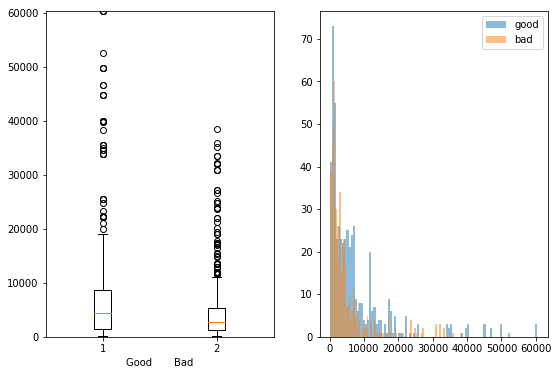

386321
1050
2.2083650091640785
data_40_-1유통업


            예보      이용금액
예보    1.000000  0.104183
이용금액  0.104183  1.000000


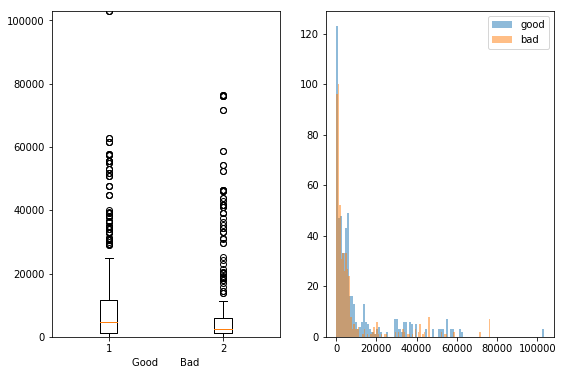

526619
1050
2.2657818607611855
data_45_-1유통업


            예보      이용금액
예보    1.000000  0.132891
이용금액  0.132891  1.000000


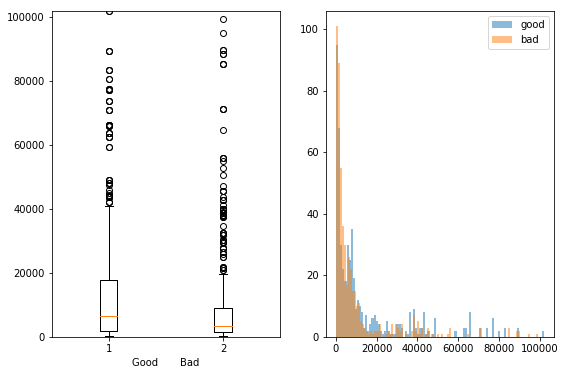

26136
794
1.688384842461541
data_45_-1서적문구


            예보      이용금액
예보    1.000000 -0.155808
이용금액 -0.155808  1.000000


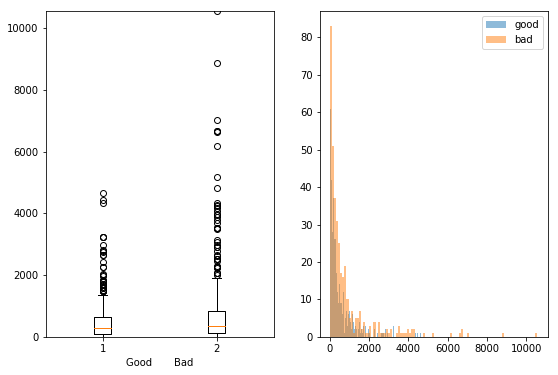

42160
603
2.2553416730984743
data_50_1연료판매


            예보      이용금액
예보    1.000000  0.127671
이용금액  0.127671  1.000000


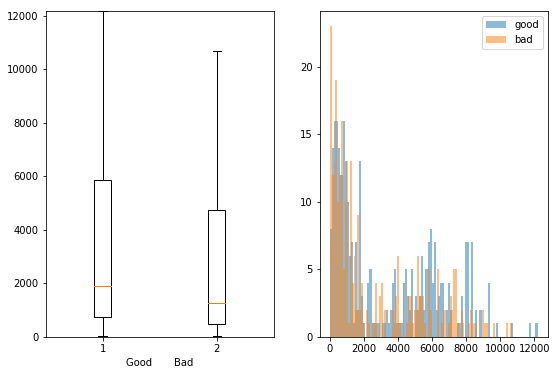

362313
1050
2.229803264500747
data_50_1유통업


            예보      이용금액
예보    1.000000  0.114902
이용금액  0.114902  1.000000


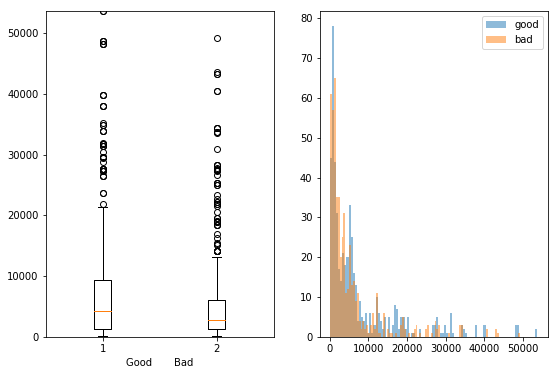

433954
1050
2.2420475752141136
data_50_-1유통업


            예보      이용금액
예보    1.000000  0.121024
이용금액  0.121024  1.000000


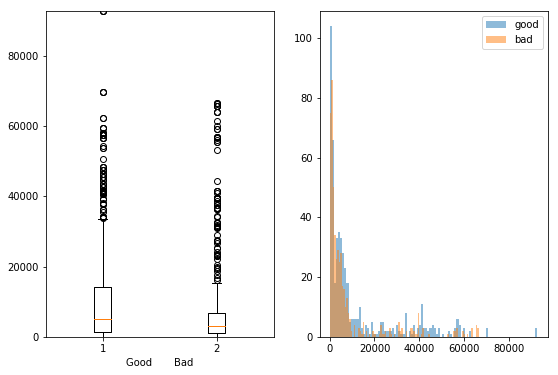

489097
1050
2.308692686041166
data_20_1유통업


            예보      이용금액
예보    1.000000  0.154346
이용금액  0.154346  1.000000


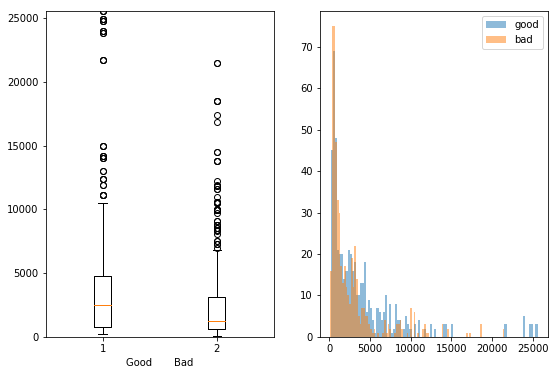

29344
918
2.292271505872355
data_20_1음료식품


            예보      이용금액
예보    1.000000  0.146136
이용금액  0.146136  1.000000


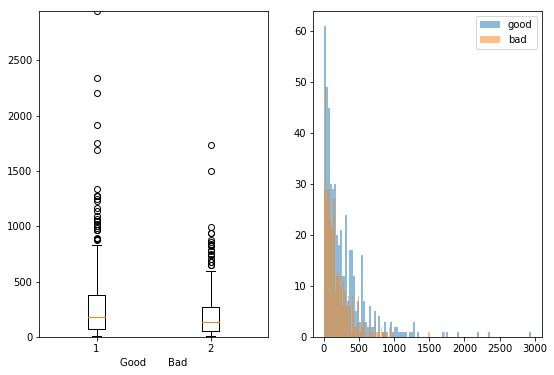

549098
1050
2.2515782659561525
data_20_-1유통업


            예보      이용금액
예보    1.000000  0.125789
이용금액  0.125789  1.000000


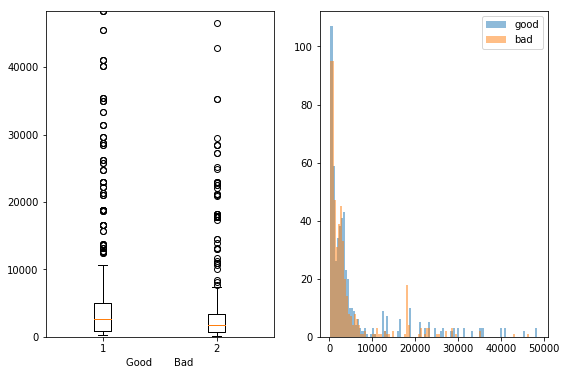

50065
575
2.357967715412129
data_55_1연료판매


            예보      이용금액
예보    1.000000  0.178984
이용금액  0.178984  1.000000


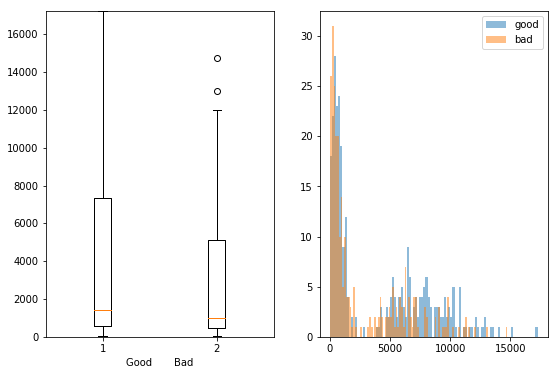

259169
1050
2.305578058679048
data_55_1유통업


            예보      이용금액
예보    1.000000  0.152789
이용금액  0.152789  1.000000


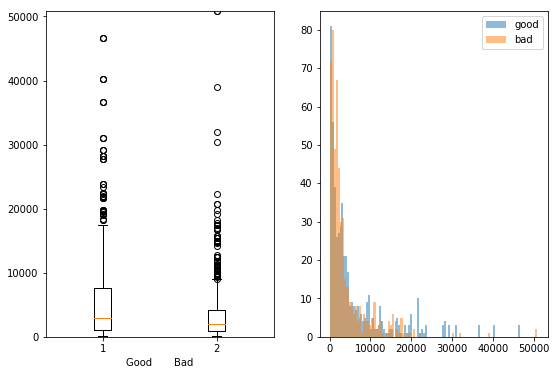

13752
728
2.2255873987964665
data_55_1레저업소


            예보      이용금액
예보    1.000000  0.112794
이용금액  0.112794  1.000000


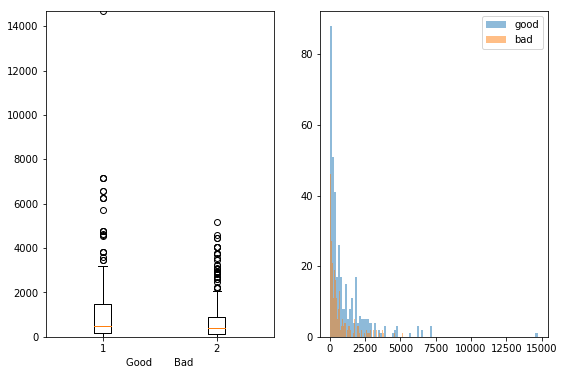

331421
1049
2.2221235320677453
data_55_-1유통업


            예보      이용금액
예보    1.000000  0.111062
이용금액  0.111062  1.000000


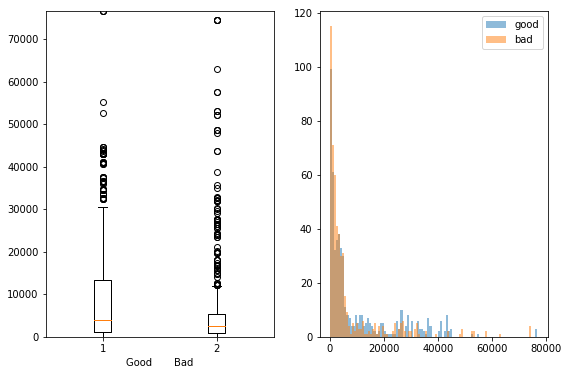

67235
546
2.34794119415591
data_60_1연료판매


            예보      이용금액
예보    1.000000  0.173971
이용금액  0.173971  1.000000


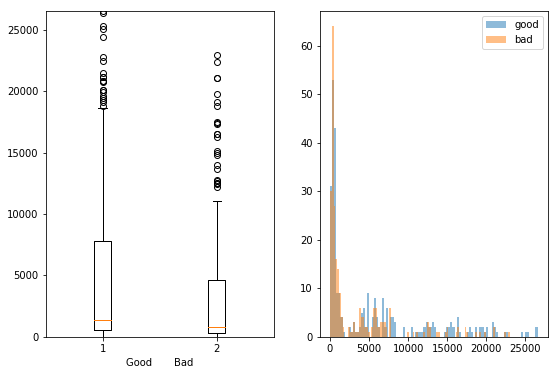

169351
1050
2.2704559911110356
data_60_1유통업


            예보      이용금액
예보    1.000000  0.135228
이용금액  0.135228  1.000000


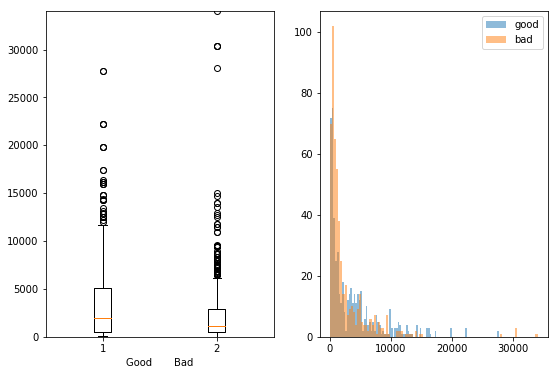

207121
1048
2.2549806833783443
data_60_-1유통업


           예보     이용금액
예보    1.00000  0.12749
이용금액  0.12749  1.00000


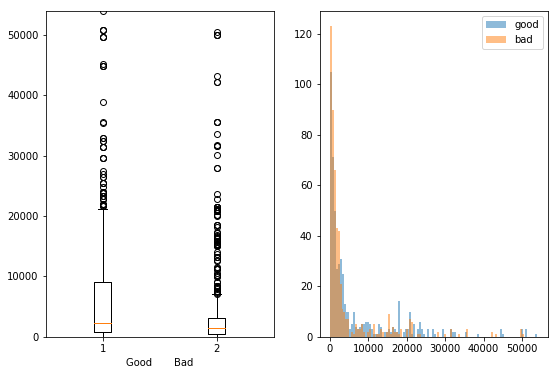

11116
478
1.6723577967460819
data_30_1문화취미


            예보      이용금액
예보    1.000000 -0.163821
이용금액 -0.163821  1.000000


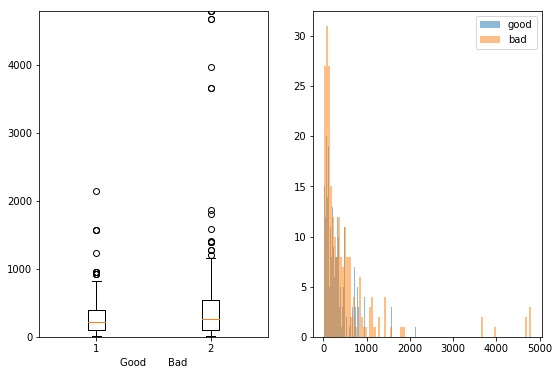

478400
1050
2.2157894852087265
data_30_1유통업


            예보      이용금액
예보    1.000000  0.107895
이용금액  0.107895  1.000000


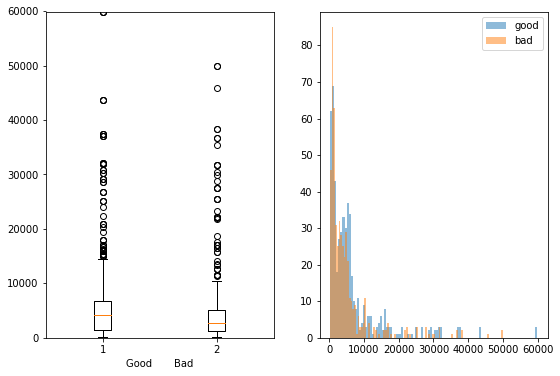

17612
577
2.2372488139598805
data_30_1자동차정비


            예보      이용금액
예보    1.000000  0.118624
이용금액  0.118624  1.000000


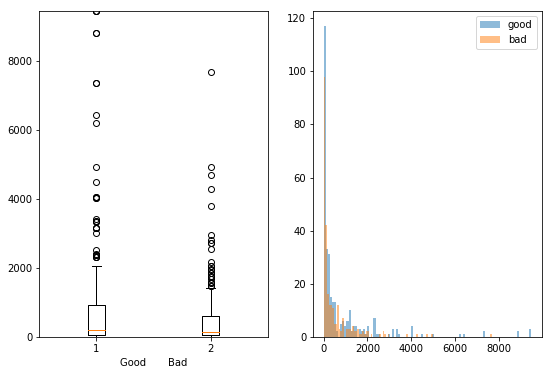

In [35]:
item_list = []

for name,data in zip(shop_data_name, shop_data):
    data3 = data
    #print(data.columns.tolist())
    
    
    corr = data3[['예보', '이용금액']].corr()
    
    
    if(((np.sum(data3['이용건수'])) > 10000) & ((np.sum(np.sum(corr)) > 2.2) | (np.sum(np.sum(corr)) < 1.8))):
        print((np.sum(data3['이용건수'])))
        print((len(data3['이용건수'])))
        print(np.sum(np.sum(corr)))
        print(name)
        item_list.append(name + str(np.sum(np.sum(corr))))
        print('\n')
        print(corr)
        
        data3_g = data3[data3.날짜.isin(day_g_115)]
        data3_b = data3[data3.날짜.isin(day_b_115)]
        fig = plt.figure(1, figsize=(9, 6))
        plt.subplot(1,2,1)
        
        data3_gb = [data3_g['이용금액'], data3_b['이용금액']]
        plt.xlabel('Good       Bad')
        plt.boxplot(data3_gb)
        q4 = data3['이용금액'].quantile(1)
        plt.ylim(0,q4)
        
        plt.subplot(1,2,2)
        plt.hist(data3_g.이용금액, label = 'good', bins = 100, alpha = 0.5)
        plt.hist(data3_b.이용금액, label = 'bad', bins = 100, alpha = 0.5)
        plt.legend(loc = 'upper right')
        plt.show()

In [195]:
sex_list = set(df_target['성별코드'].values)
age_list = set(df_target['나이코드'].values)

sex_age_data = []
sex_age_data_name = []

for age,sex in itertools.product(age_list, sex_list):
    
    data_name = 'data_' + str(age) + '_' + str(sex)
    sex_age_data.append(df_target[(df_target['나이코드'] == age) & (df_target['성별코드'] == sex)])
    sex_age_data_name.append(data_name)

1.992714630163893
data_65_1


                    예보  FLOW_POP_CNT
예보            1.000000     -0.003643
FLOW_POP_CNT -0.003643      1.000000


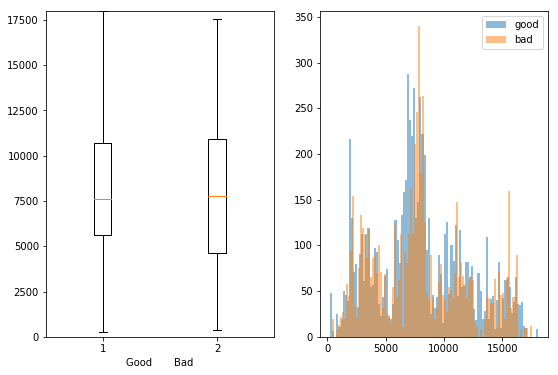

2.0404456881998385
data_65_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.020223
FLOW_POP_CNT  0.020223      1.000000


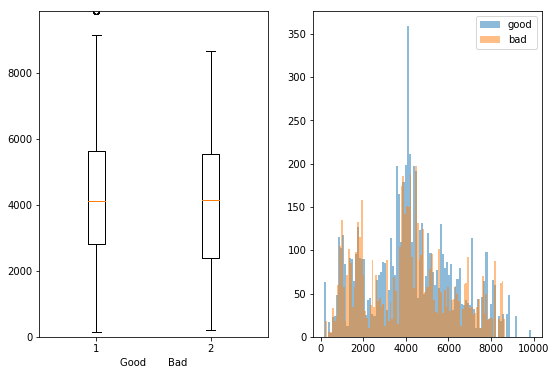

2.119514884722115
data_35_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.059757
FLOW_POP_CNT  0.059757      1.000000


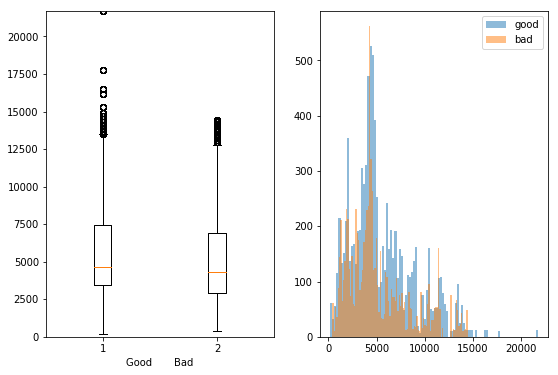

2.1222056319076112
data_35_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.061103
FLOW_POP_CNT  0.061103      1.000000


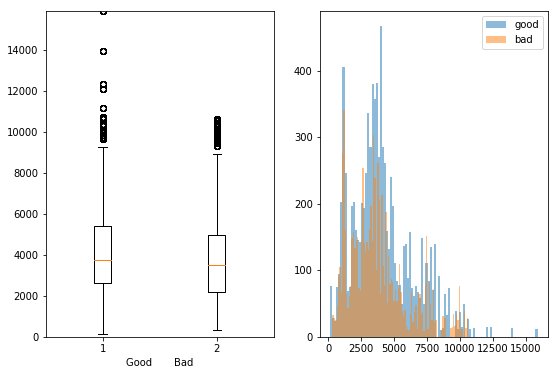

2.1200480224241263
data_40_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.060024
FLOW_POP_CNT  0.060024      1.000000


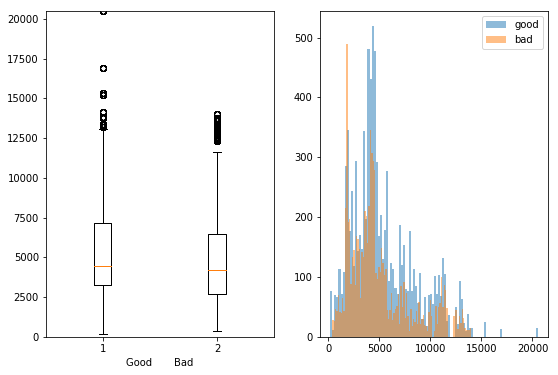

2.119163414012297
data_40_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.059582
FLOW_POP_CNT  0.059582      1.000000


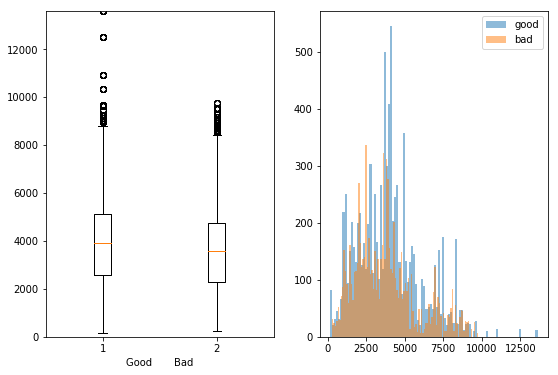

2.113166987012647
data_45_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.056583
FLOW_POP_CNT  0.056583      1.000000


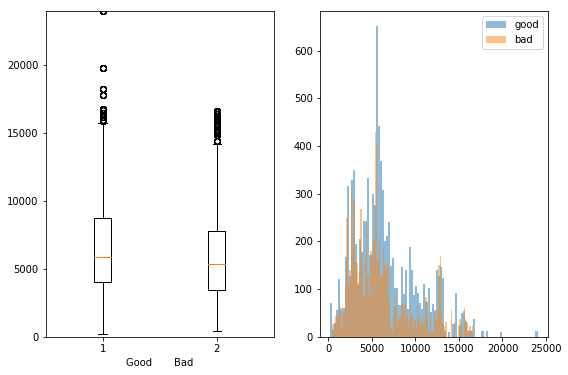

2.129189753931908
data_45_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.064595
FLOW_POP_CNT  0.064595      1.000000


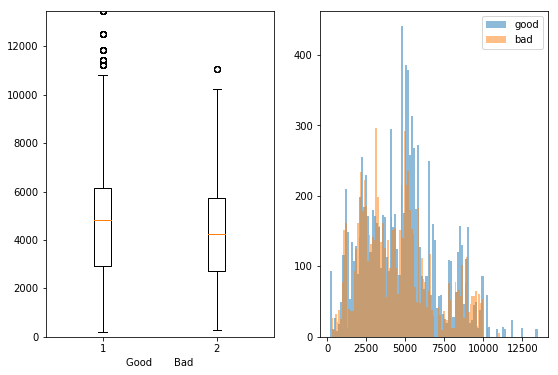

2.0947313492766892
data_50_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.047366
FLOW_POP_CNT  0.047366      1.000000


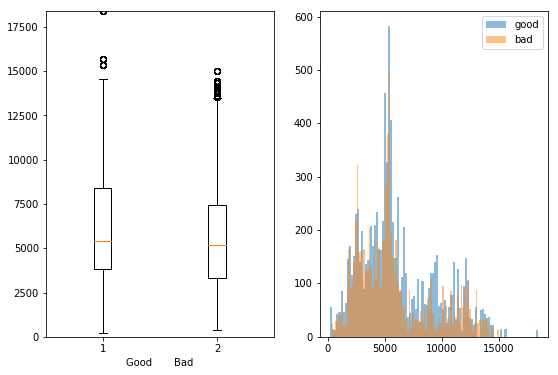

2.109411554953645
data_50_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.054706
FLOW_POP_CNT  0.054706      1.000000


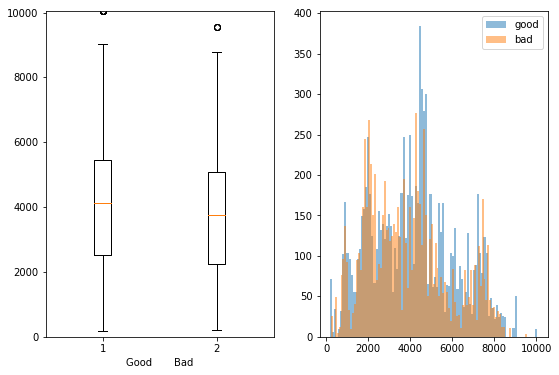

2.1436364661192178
data_20_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.071818
FLOW_POP_CNT  0.071818      1.000000


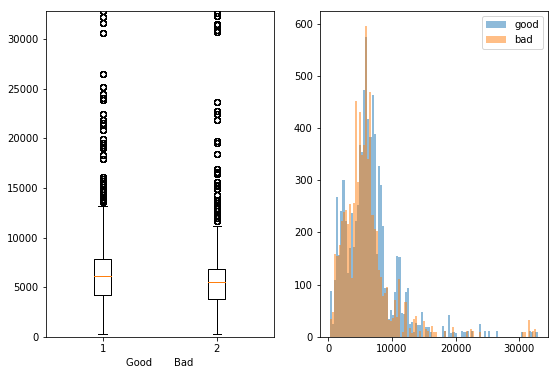

2.0710530739801163
data_20_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.035527
FLOW_POP_CNT  0.035527      1.000000


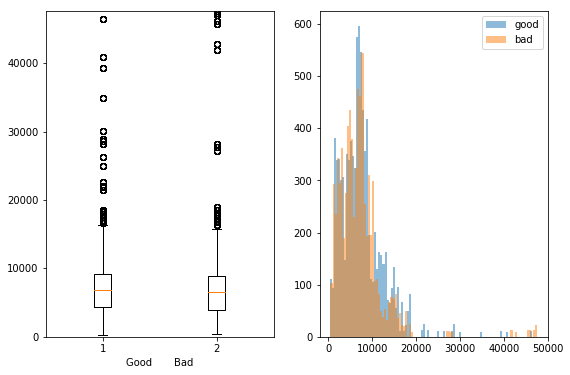

2.118805295436089
data_55_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.059403
FLOW_POP_CNT  0.059403      1.000000


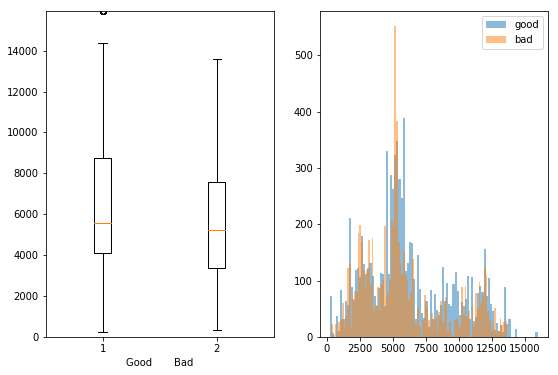

2.1642945296019165
data_55_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.082147
FLOW_POP_CNT  0.082147      1.000000


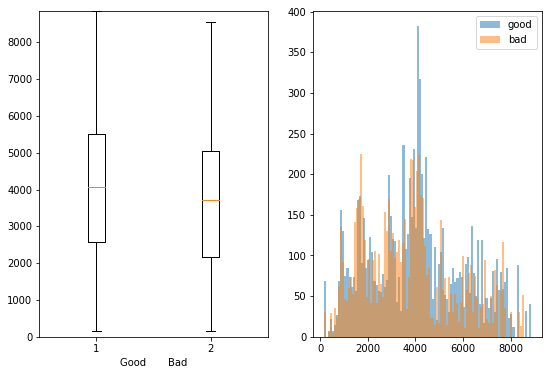

2.073729322033371
data_25_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.036865
FLOW_POP_CNT  0.036865      1.000000


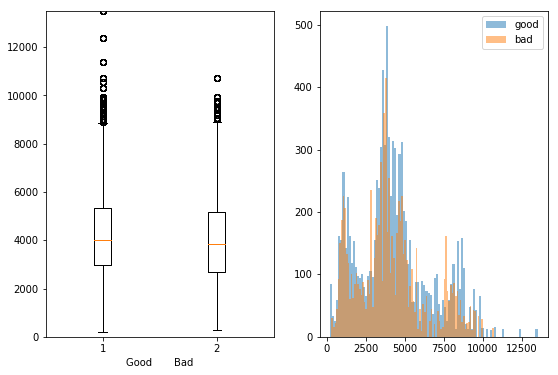

2.0359802295000122
data_25_-1


                   예보  FLOW_POP_CNT
예보            1.00000       0.01799
FLOW_POP_CNT  0.01799       1.00000


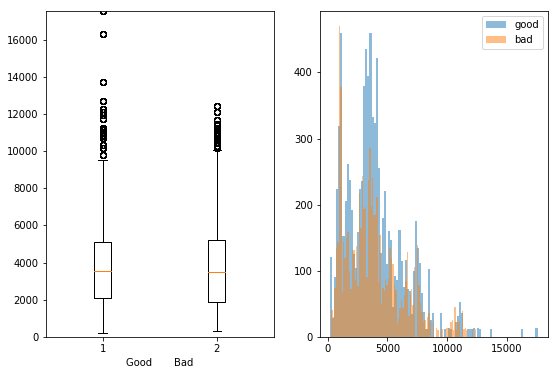

2.0909385186176084
data_60_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.045469
FLOW_POP_CNT  0.045469      1.000000


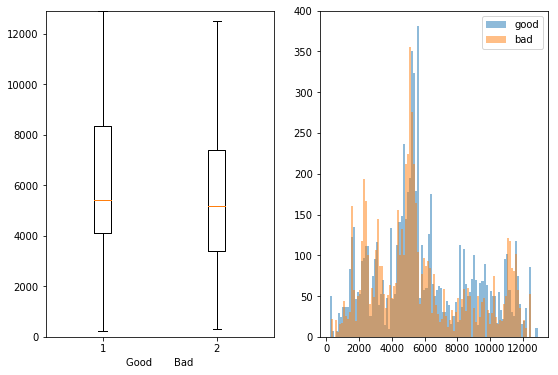

2.096902332246806
data_60_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.048451
FLOW_POP_CNT  0.048451      1.000000


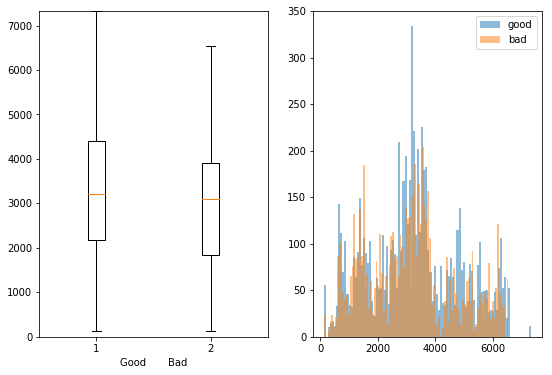

2.0918967734475564
data_30_1


                    예보  FLOW_POP_CNT
예보            1.000000      0.045948
FLOW_POP_CNT  0.045948      1.000000


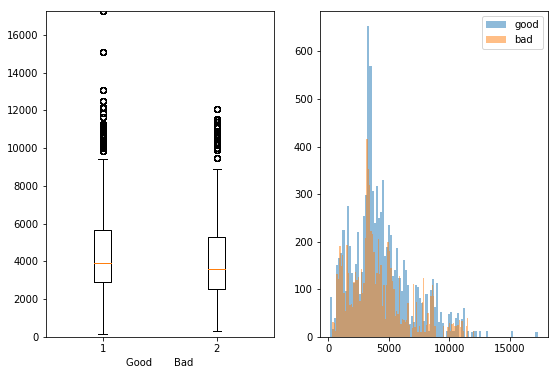

2.0591306312838924
data_30_-1


                    예보  FLOW_POP_CNT
예보            1.000000      0.029565
FLOW_POP_CNT  0.029565      1.000000


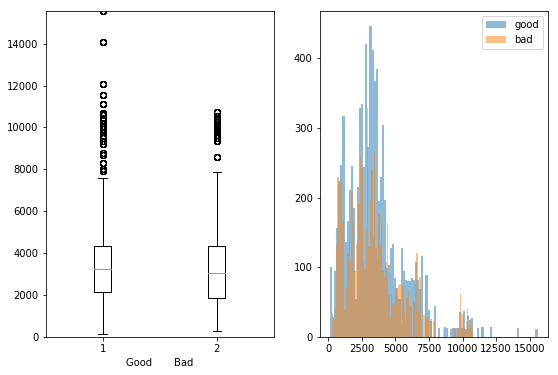

In [200]:
sex_age_item_list = []

for name,data in zip(sex_age_data_name, sex_age_data):
    data3 = data
    #print(data.columns.tolist())
    
    
    corr = data3[['예보', 'FLOW_POP_CNT']].corr()
    
    
    if(True):
        print(np.sum(np.sum(corr)))
        print(name)
        item_list.append(name + str(np.sum(np.sum(corr))))
        print('\n')
        print(corr)
        
        data3_g = data3[data3.날짜.isin(day_g_115)]
        data3_b = data3[data3.날짜.isin(day_b_115)]
        fig = plt.figure(1, figsize=(9, 6))
        plt.subplot(1,2,1)
        
        data3_gb = [data3_g['FLOW_POP_CNT'], data3_b['FLOW_POP_CNT']]
        plt.xlabel('Good       Bad')
        plt.boxplot(data3_gb)
        q4 = data3['FLOW_POP_CNT'].quantile(1)
        plt.ylim(0,q4)
        
        plt.subplot(1,2,2)
        plt.hist(data3_g.FLOW_POP_CNT, label = 'good', bins = 100, alpha = 0.5)
        plt.hist(data3_b.FLOW_POP_CNT, label = 'bad', bins = 100, alpha = 0.5)
        plt.legend(loc = 'upper right')
        plt.show()
        #유동인구는 전 연령대에서 감소한다.

In [190]:
item_list

['data_65_1유통업2.2356701301252717',
 'data_35_1유통업2.226636877310968',
 'data_35_-1유통업2.221542022564018',
 'data_35_-1자동차정비1.778098320596749',
 'data_40_1유통업2.244670233437321',
 'data_45_-1서적문구1.7159252926107795',
 'data_45_-1유통업2.2234321623036766',
 'data_50_1연료판매2.208512717542058',
 'data_20_1의복2.2044217629704095',
 'data_20_1유통업2.2344417745370926',
 'data_20_-1유통업2.210268489489906',
 'data_20_-1레저용품2.3020304223569865',
 'data_55_1연료판매2.264383455252615',
 'data_55_1유통업2.2139564021259037',
 'data_60_1연료판매2.2271897677877446',
 'data_60_1유통업2.246427234519578',
 'data_30_1문화취미1.790874960565715',
 'data_30_1유통업2.2149797104852738',
 'data_30_1자동차정비2.2266219124565776',
 'data_30_-1연료판매2.2103520765617537']

295150
1788
2.254009362549836
data_65_1유통업


            예보      이용금액
예보    1.000000  0.127005
이용금액  0.127005  1.000000


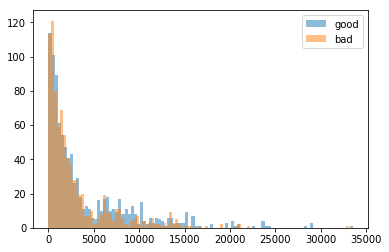

823649
1789
2.243066338053456
data_35_1유통업


            예보      이용금액
예보    1.000000  0.121533
이용금액  0.121533  1.000000


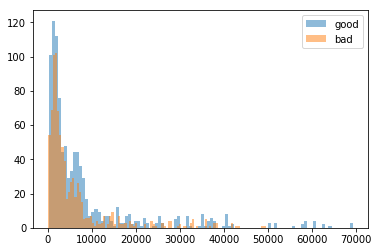

686244
1789
2.210879205012127
data_35_-1유통업


           예보     이용금액
예보    1.00000  0.10544
이용금액  0.10544  1.00000


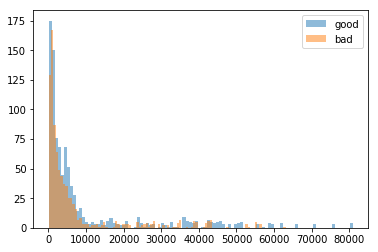

18086
735
1.7818653431924851
data_35_-1자동차정비


            예보      이용금액
예보    1.000000 -0.109067
이용금액 -0.109067  1.000000


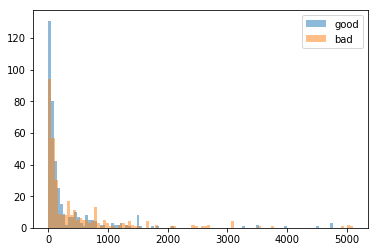

678407
1789
2.2335895993014274
data_40_1유통업


            예보      이용금액
예보    1.000000  0.116795
이용금액  0.116795  1.000000


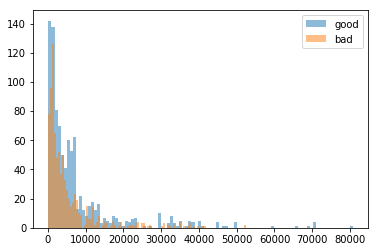

54682
1394
1.7274601645551448
data_45_-1서적문구


           예보     이용금액
예보    1.00000 -0.13627
이용금액 -0.13627  1.00000


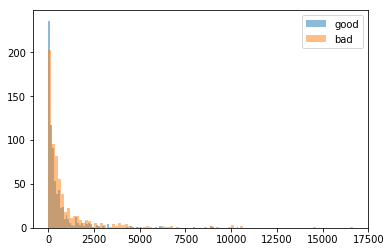

942786
1789
2.2206371692199243
data_45_-1유통업


            예보      이용금액
예보    1.000000  0.110319
이용금액  0.110319  1.000000


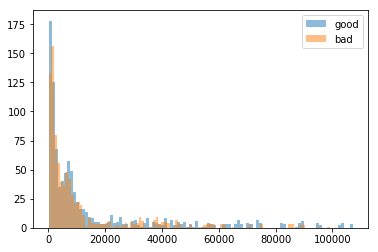

24474
1164
1.7871765796643142
data_50_1서적문구


            예보      이용금액
예보    1.000000 -0.106412
이용금액 -0.106412  1.000000


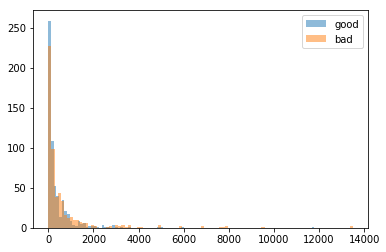

21787
641
2.20986628275092
data_20_1의복


            예보      이용금액
예보    1.000000  0.104933
이용금액  0.104933  1.000000


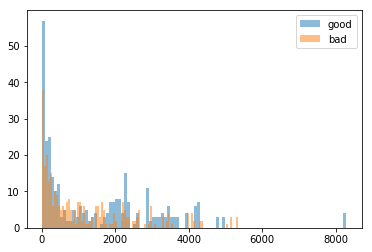

946613
1789
2.238198691668702
data_20_1유통업


            예보      이용금액
예보    1.000000  0.119099
이용금액  0.119099  1.000000


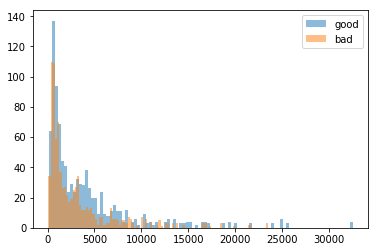

12063
505
2.2197939917297336
data_20_1레저용품


            예보      이용금액
예보    1.000000  0.109897
이용금액  0.109897  1.000000


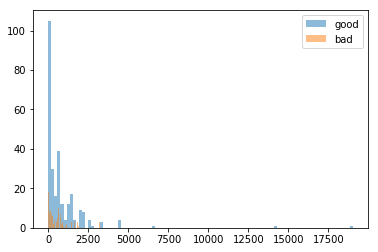

84677
970
2.2528973698343377
data_55_1연료판매


            예보      이용금액
예보    1.000000  0.126449
이용금액  0.126449  1.000000


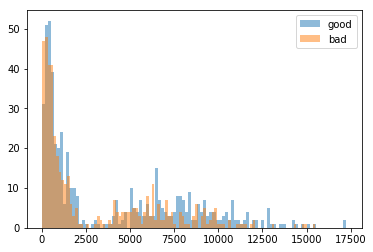

458143
1789
2.2199013455852046
data_55_1유통업


            예보      이용금액
예보    1.000000  0.109951
이용금액  0.109951  1.000000


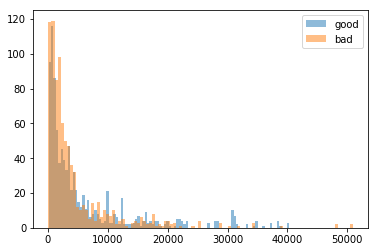

578485
1788
2.209898697853534
data_55_-1유통업


            예보      이용금액
예보    1.000000  0.104949
이용금액  0.104949  1.000000


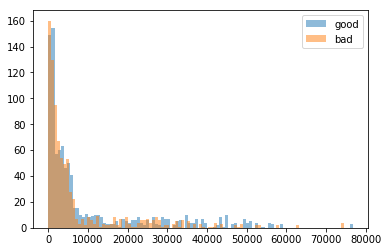

111442
930
2.223085860293861
data_60_1연료판매


            예보      이용금액
예보    1.000000  0.111543
이용금액  0.111543  1.000000


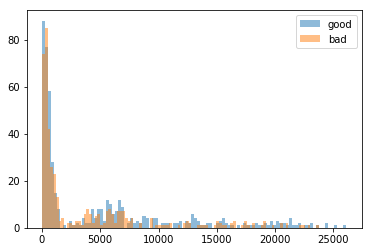

297694
1787
2.2721175294284985
data_60_1유통업


            예보      이용금액
예보    1.000000  0.136059
이용금액  0.136059  1.000000


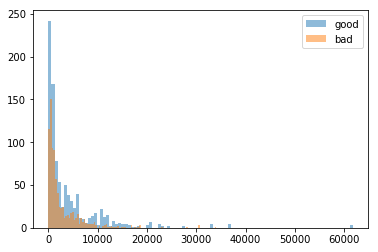

832310
1789
2.2332507845806226
data_30_1유통업


            예보      이용금액
예보    1.000000  0.116625
이용금액  0.116625  1.000000


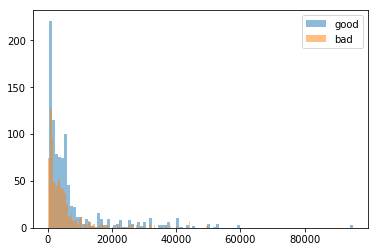

17348
846
2.20292206626221
data_30_-1연료판매


            예보      이용금액
예보    1.000000  0.101461
이용금액  0.101461  1.000000


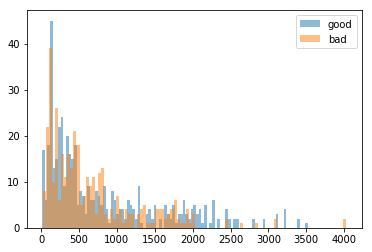

In [129]:
for name,data in zip(shop_data_name, shop_data):
    data3 = data
    corr = data3[['예보', '이용금액']].corr()
    
    if(((np.sum(data3['이용건수'])) > 10000)& ((np.sum(np.sum(corr)) > 2.2) | (np.sum(np.sum(corr)) < 1.8))):
        print((np.sum(data3['이용건수'])))
        print((len(data3['이용건수'])))
        print(np.sum(np.sum(corr)))
        print(name)
        print('\n')
        print(corr)
       

In [100]:
#업종코드별 이용금액 분포 확인하기

shop_time_data = []
shop_time_data_name = []

for shop in shop_list:
    data_name = 'data_' + str(shop)
    shop_time_data.append(df_card_flow_shop[(df_card_flow_shop['업종명'] == shop)])
    shop_time_data_name.append(data_name)

data_사무통신
7497.504109589041
9906.57647363938


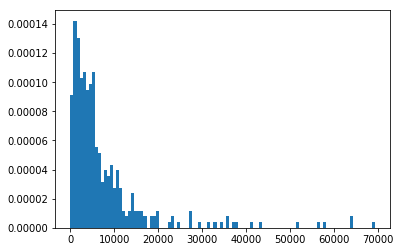

data_수리서비스
19576.290410958904
12898.927161209267


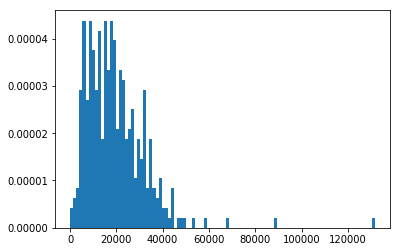

data_연료판매
435540.7582417582
100245.86479488578


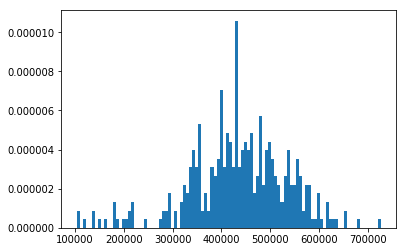

data_광학제품
16328.282191780821
11221.079472641068


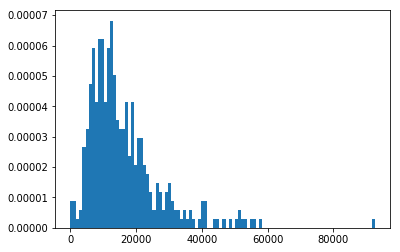

data_문화취미
74210.51780821919
30733.540118700366


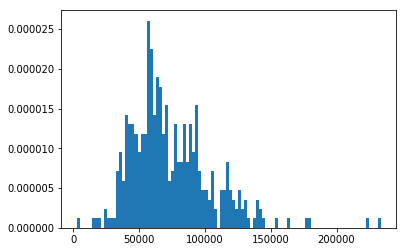

data_의복
174757.33698630138
53762.56552932217


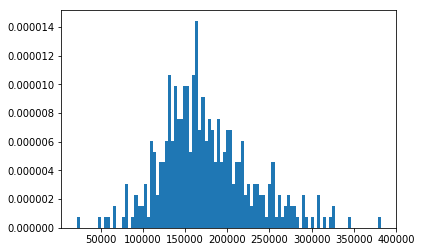

data_신변잡화
74834.95890410959
29647.8253756059


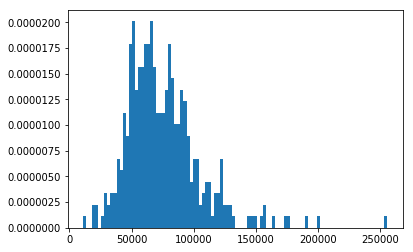

data_자동차정비
112771.20273972602
44338.92305378939


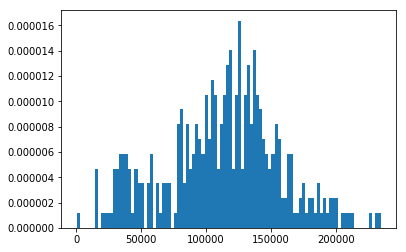

data_서적문구
180845.52602739725
135092.3740315574


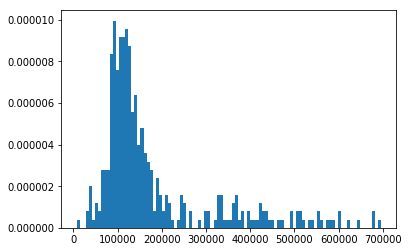

data_음료식품
265803.4
93014.08816358417


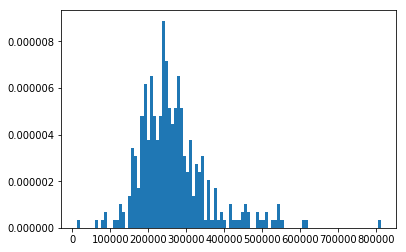

data_가전
92657.06868131868
55573.43811440115


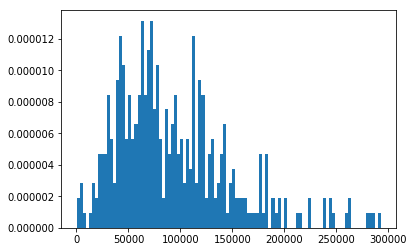

data_레저업소
252258.52328767124
62497.93634180012


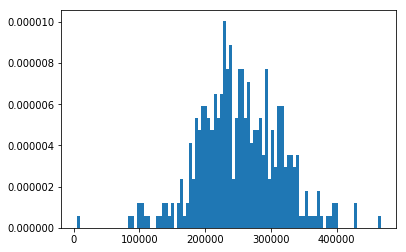

data_숙박
82812.05479452055
43388.047318054196


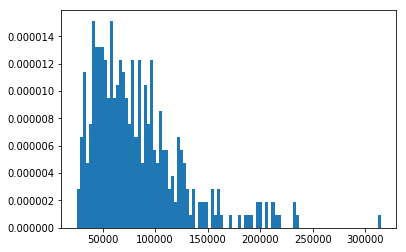

data_직물
7289.30303030303
7401.820832991692


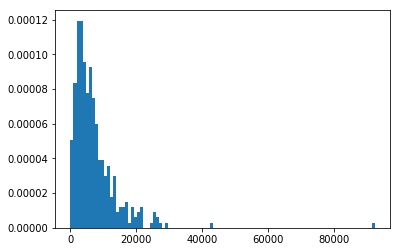

data_전기
7018.050445103858
6671.792499598043


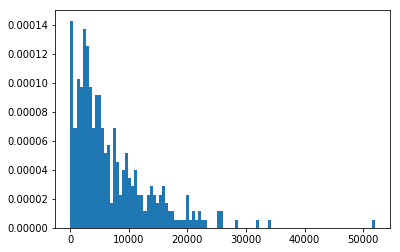

data_주방용구
11633.477900552487
20659.16201016437


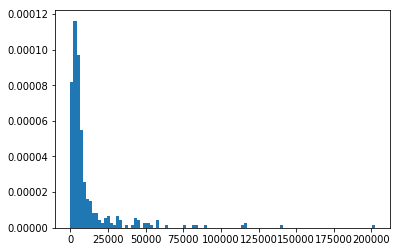

data_가구
8921.954929577465
10528.80237257712


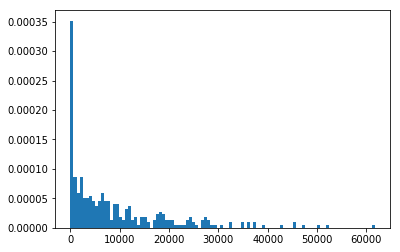

data_보건위생
337382.53698630136
96254.57475731551


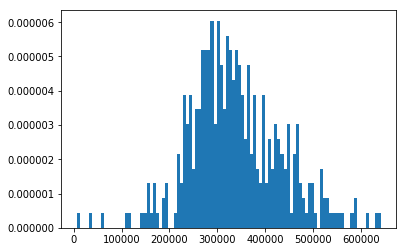

data_의료기관
1819037.104109589
874587.0251057565


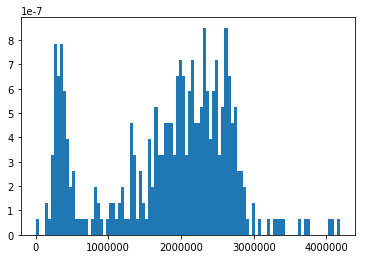

data_요식업소
3283939.926027397
792146.1552267784


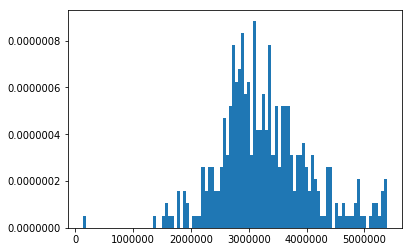

data_자동차판매
5458.950617283951
7786.839894384066


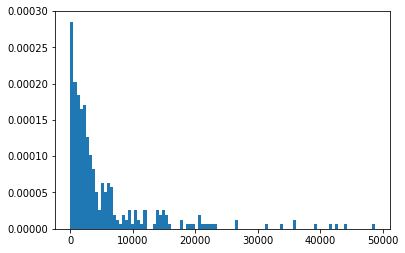

data_레저용품
89697.80821917808
38695.64213128219


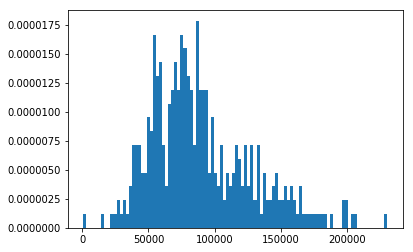

data_유통업
2878842.4410958905
873924.1036297635


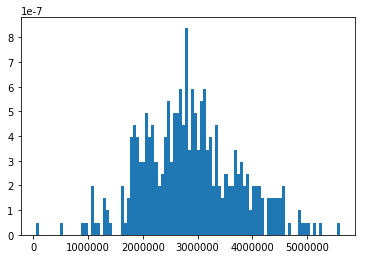

IndexError: list index out of range

In [117]:
for i in range(30):
    shop_plt_data_i = shop_time_data[i].groupby(by='날짜',as_index=False).sum()
    ##x = plt.plot(shop_plt_data['날짜'], shop_plt_data['이용금액'])
    plt.hist(shop_plt_data_i['이용금액'], bins = 100, normed = True)
    print(shop_time_data_name[i])
    print(np.mean(shop_plt_data_i['이용금액']))
    print(np.std(shop_plt_data_i['이용금액']))
    plt.show()

